# Import dataset into your workspace

In [104]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [105]:
df = pd.read_csv('auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [106]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [107]:
df.shape

(398, 9)

# Data cleaning: handling missing values

In [108]:
#handling missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [109]:
# or we can also write
df.isnull().any()
#congrats we don't have any null values

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [110]:
print(df.cylinders.unique())
print(df.horsepower.unique())

[8 4 6 3 5]
['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


There's a '?' in horsepower, it needs to be removed

In [111]:
df = df[df.horsepower != '?']
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There are also some spelling mistakes some companies are named differently , lets correct these

In [112]:
df['car name'] = df['car name'].replace(['volkswagen','vokswagen','vw'],'VW')
df['car name'] = df['car name'].replace('toyouta','toyota')
df['car name'] = df['car name'].replace(['chevrolet','chevroelt','chevy'],'chevrolet')
df['car name'] = df['car name'].replace(['mercedes','mercedes-benz','mercedes benz'],'mercedes')

Lets have a look at the car name column, displacement and horsepower

In [113]:
df.displacement.isnull().any()

False

In [114]:
df.horsepower.isnull().any()

False

In [115]:
df['car name'].isnull().any()
#there are no null values

False

In [116]:
df.dtypes
#horsepower is object type , lets convert it to float

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [117]:
df.horsepower= df.horsepower.astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

# Descriptive analysis and Visualizations

In [118]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


lets have a look at the target variable

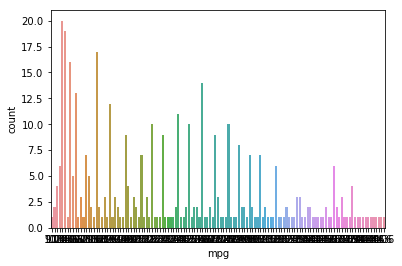

In [119]:
sn.countplot(x= 'mpg', data = df)

Ah! lets use some other visualization

H:\Anaconda_work\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


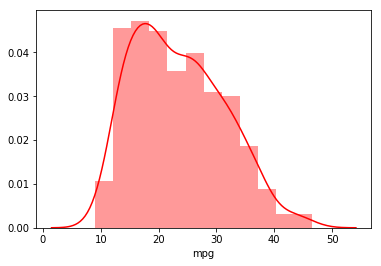

In [120]:
#lets plot distplot
sn.distplot(df['mpg'], color='red')

In [121]:
#origin fearure
df.groupby(['car name']).sum()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
amc ambassador brougham,13.0,8,360.0,175.0,3821,11.0,73,1
amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1
amc ambassador sst,17.0,8,304.0,150.0,3672,11.5,72,1
amc concord,43.7,10,383.0,180.0,6213,37.3,158,2
amc concord d/l,18.1,6,258.0,120.0,3410,15.1,78,1
amc concord dl 6,20.2,6,232.0,90.0,3265,18.2,79,1
amc gremlin,78.0,24,895.0,390.0,10985,59.0,289,4
amc hornet,77.5,24,895.0,387.0,11705,65.1,293,4
amc hornet sportabout (sw),18.0,6,258.0,110.0,2962,13.5,71,1


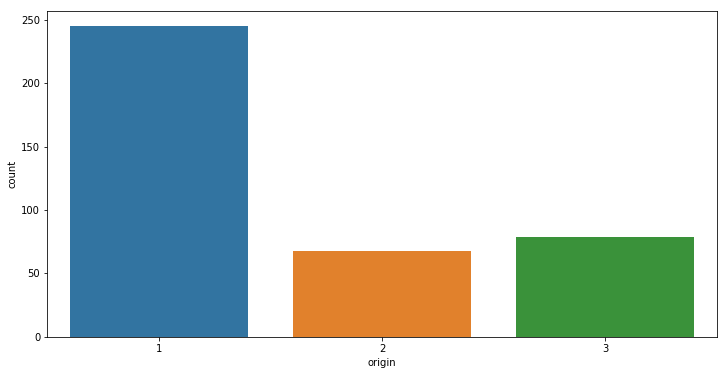

In [122]:
#plotting cars by origin
fig, ax= plt.subplots(figsize = (12,6))
sn.countplot(x= df.origin, data = df)

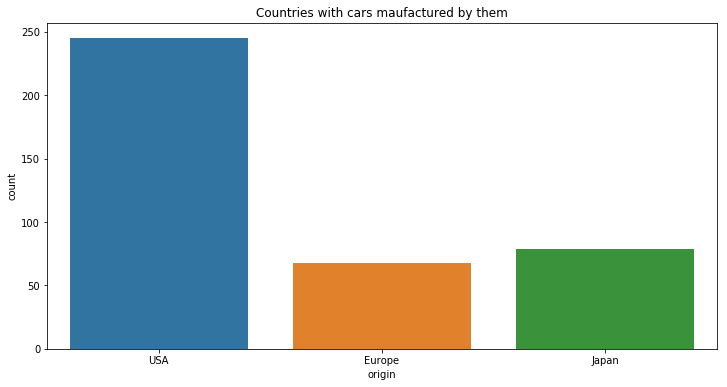

In [123]:
#here we have labels like 1,2,3 lets give them names
#plotting cars by origin
fig, ax= plt.subplots(figsize = (12,6))
sn.countplot(x= df.origin, data = df)
names = [item.get_text() for item in ax.get_xticklabels()]
names[0] = 'USA'
names[1] = 'Europe'
names[2] = 'Japan'
ax.set_xticklabels(names)
ax.set_title("Countries with cars maufactured by them")
plt.show()

In [124]:
#USA has manufactured more cars than Europe and japan

Lets have a look at the features

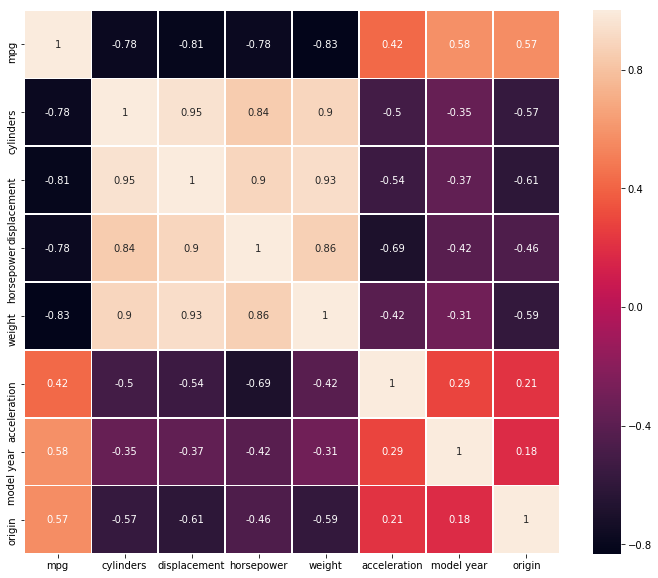

In [125]:
plt.figure(figsize =(12,10))
sn.heatmap(df.corr()
          , linewidths= 0.3,annot = True)

model year, origin and acceleration have positive correlation with mpg

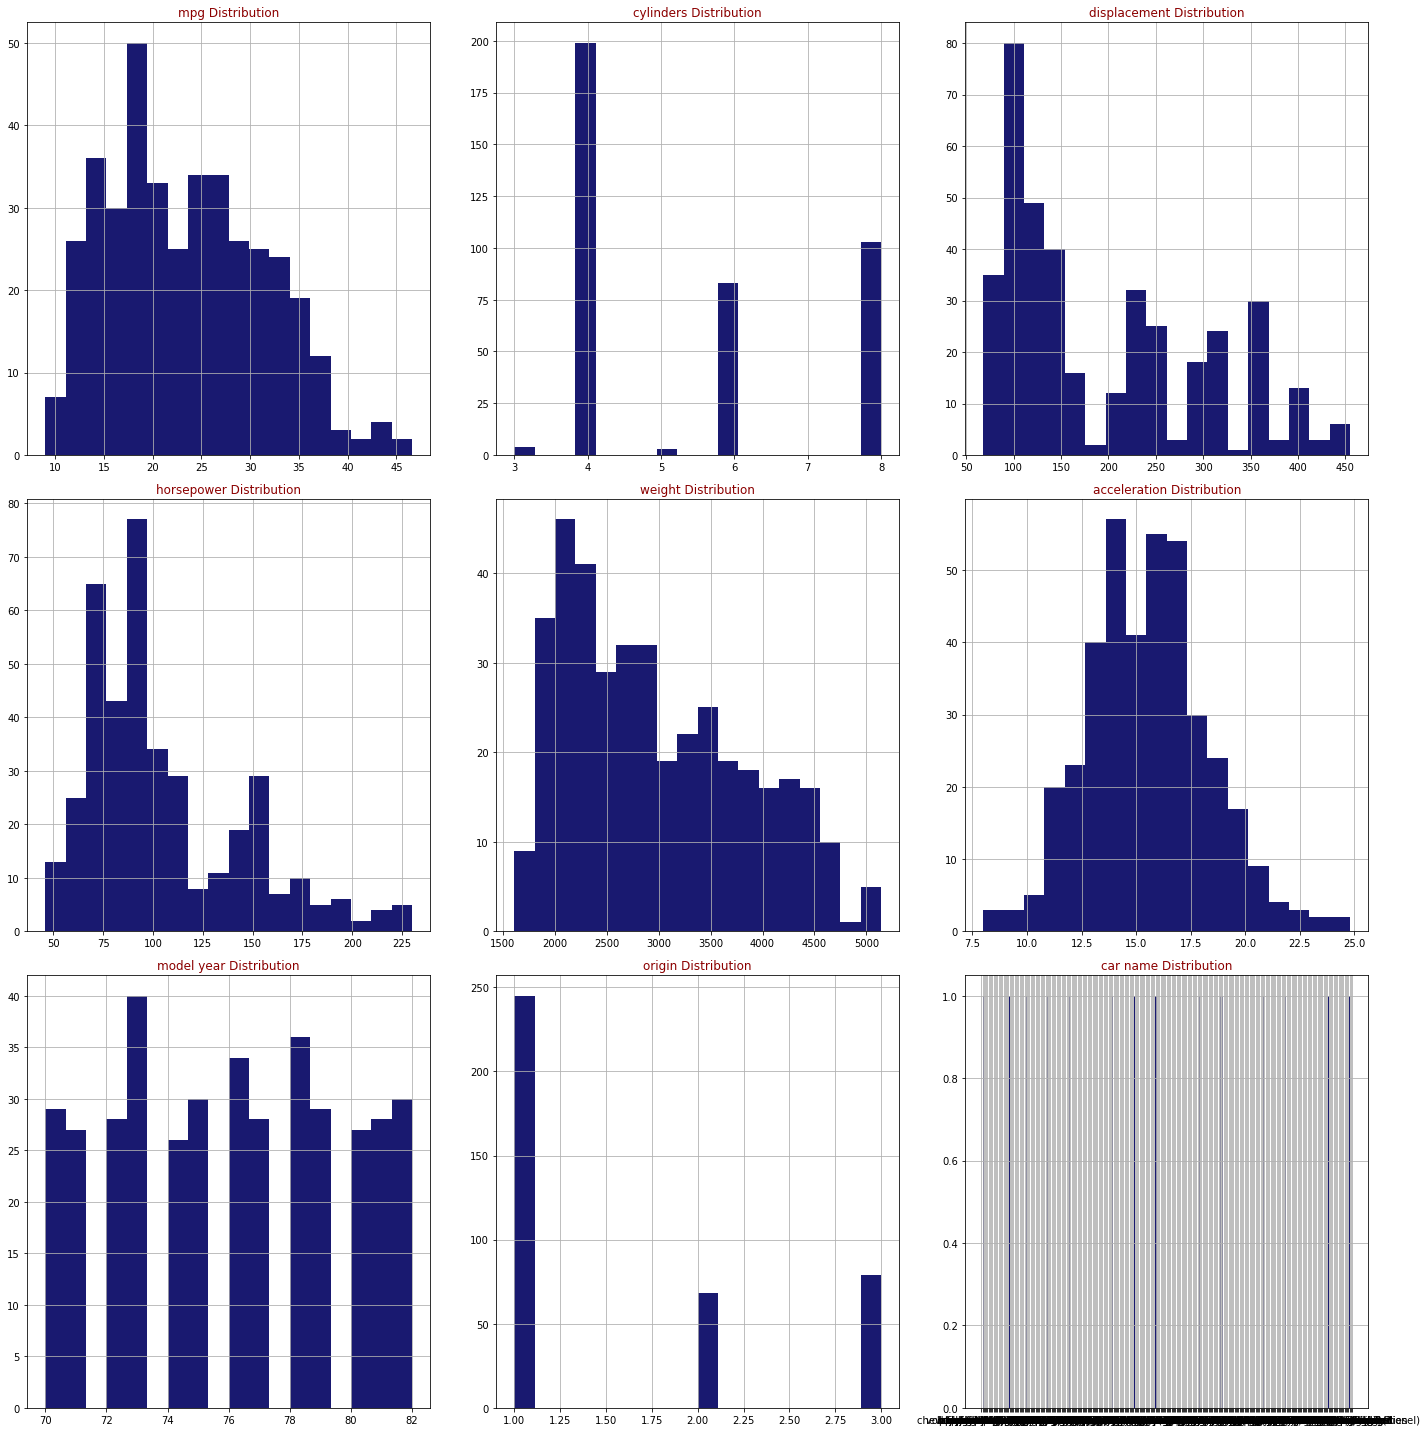

In [126]:
#define a function to plot histograms for all features

def plot_all(df, features,r,c):
    fig = plt.figure(figsize = (20,20))
    for i, f in enumerate(features):
        ax= fig.add_subplot(r,c,i+1)
        df[f].hist(bins= 18, ax= ax, facecolor='midnightblue')
        ax.set_title(f+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
plot_all(df,df.columns,3,3)    

In [127]:
df.shape

(392, 9)

In [82]:
X= df[['origin','acceleration','model year']]
y= df['mpg']

In [83]:
#split the data
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size = .2)
x_train

,origin,acceleration,model year
292,1,13.0,79
129,3,19.0,74
162,1,19.0,75
164,1,15.0,75
54,3,18.0,71
60,1,19.5,72
281,1,18.2,79
353,2,14.2,81
357,3,14.8,81
191,1,15.4,76


In [88]:
tree = DecisionTreeRegressor(max_depth = 5,random_state=1)

In [89]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [90]:
y_pred = tree.predict(x_test)

In [92]:
from sklearn.model_selection import cross_val_score
validate = cross_val_score(tree, X,y,cv =5)

In [93]:
validate

array([ 0.62724202,  0.6004901 , -1.05426263,  0.19846334, -0.36408806])

In [94]:
np.mean(validate)

0.001568956162190216

In [97]:
from sklearn.metrics import mean_squared_error as MSE
mse = MSE(y_test, y_pred)
rmse =mse**(1/2)

In [98]:
rmse

4.549061676628049